In [29]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
ROOT.ROOT.EnableImplicitMT()

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.cc","k")

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/functions.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/functions.cc","k")

Info in <ACLiC>: unmodified script has already been compiled and loaded
Info in <ACLiC>: unmodified script has already been compiled and loaded


In [30]:
pi1Mass = 0.13957018
k1Mass = 0.493677
mass1, mass2 = 0, 0

date = "AUG25"
channel = "omega"
mesonCat = ""
mesonNum = 0
if (channel == "omega"):
    mesonCat = "OmegaCat"
    mesonNum = 1038
    mass1, mass2 = pi1Mass, pi1Mass
elif (channel == "phi"):
    mesonCat = "Phi3Cat"
    mesonNum = 1039
    mass1, mass2 = pi1Mass, pi1Mass
elif (channel == "d0starrho"):
    mesonCat = "D0StarRhoCat"
    mesonNum = 1040
    mass1, mass2 = pi1Mass, k1Mass
elif (channel == "d0star"):
    mesonCat = "D0StarCat"
    mesonNum = 1041
    mass1, mass2 = pi1Mass, k1Mass
else:
    raise Exception("Wrong channel.")

chainSGN = ROOT.TChain("events")
chainSGN.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc{1}_GFcat_{2}_2018.root".format(date, mesonNum, mesonCat))

dfSGN = ROOT.RDataFrame(chainSGN)
dfSGN = (dfSGN.Define("scale", "w*lumiIntegrated"))

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


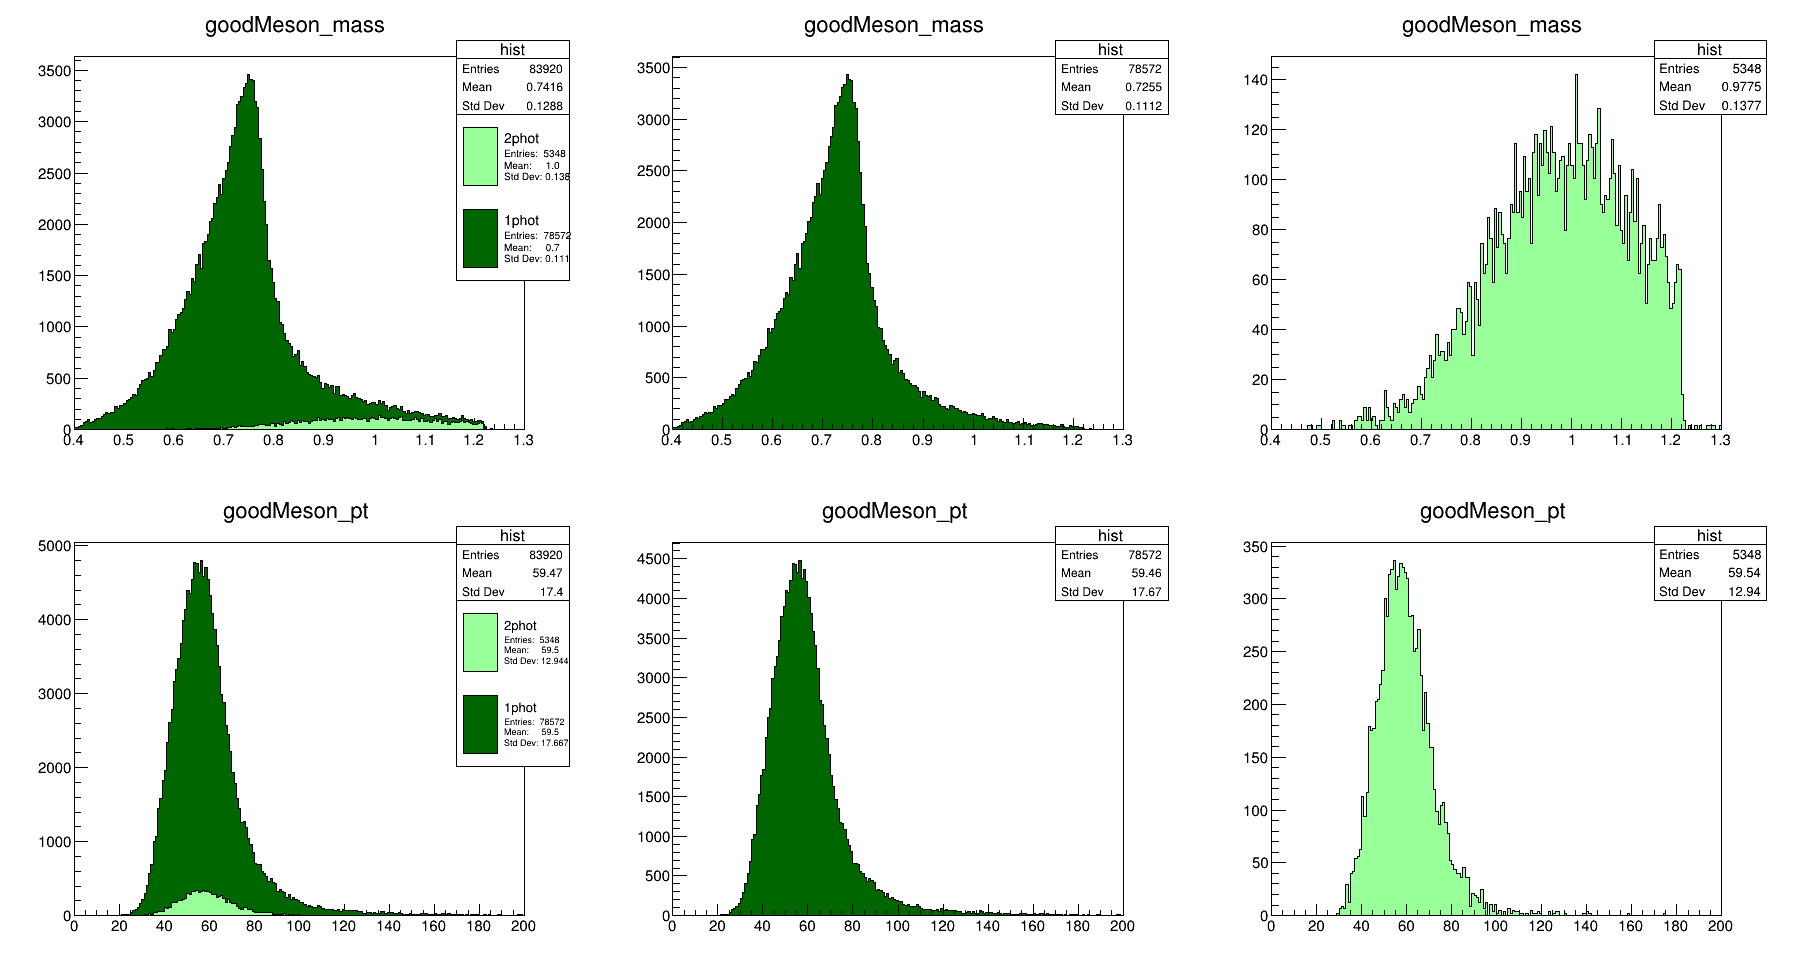

In [31]:
canvas = ROOT.TCanvas("canvas", "canvas", 1800, 1000)
canvas.Divide(3, 2)

nbins, xlow, xhigh = 200, 0.4, 1.3

p = canvas.cd(1)
h = dfSGN.Histo1D(("hist", "goodMeson_mass", nbins, xlow, xhigh), "goodMeson_mass", "scale")
h.SetFillColor(ROOT.kGreen-9)
h.SetLineWidth(0)
h.Draw("hist")
h1 = dfSGN.Filter("goodMeson_Nphotons[0] == 1").Histo1D(("hist", "goodMeson_mass", nbins, xlow, xhigh), "goodMeson_mass", "scale").GetValue()
h2 = dfSGN.Filter("goodMeson_Nphotons[0] > 1").Histo1D(("hist", "goodMeson_mass", nbins, xlow, xhigh), "goodMeson_mass", "scale").GetValue()

h1.SetFillColor(ROOT.kGreen+3)
h1.SetLineColor(ROOT.kBlack)
h2.SetFillColor(ROOT.kGreen-9)
h2.SetLineColor(ROOT.kBlack)

stackGEN1 = ROOT.THStack("stack", "goodMeson_mass")
stackGEN1.Add(h2)
stackGEN1.Add(h1)
stackGEN1.Draw("hist same")
legendGEN1 = ROOT.TLegend(0.78, 0.42, 0.98, 0.775)
legendGEN1.AddEntry(h2, "#splitline{{#splitline{{#scale[1.4]{{2phot}}}}{{Entries:  {0}}}}}{{#splitline{{Mean:     {1}}}{{Std Dev: {2}}}}}".format(int(h2.GetEntries()), round(h2.GetMean(), 1), round(h2.GetStdDev(), 3)), "f")
legendGEN1.AddEntry(h1, "#splitline{{#scale[1.4]{{1phot}}}}{{#splitline{{Entries:  {0}}}{{#splitline{{Mean:     {1}}}{{Std Dev: {2}}}}}}}".format(int(h1.GetEntries()), round(h1.GetMean(), 1), round(h1.GetStdDev(), 3)), "f")
legendGEN1.SetEntrySeparation(0.79)
legendGEN1.SetMargin(0.42)
legendGEN1.Draw()

p = canvas.cd(2)
h1.Draw("hist")

p = canvas.cd(3)
h2.Draw("hist")



nbins, xlow, xhigh = 200, 0.0, 200.

p = canvas.cd(4)
hpt = dfSGN.Histo1D(("hist", "goodMeson_pt", nbins, xlow, xhigh), "goodMeson_pt", "scale")
hpt.SetFillColor(ROOT.kGreen-9)
hpt.SetLineWidth(0)
hpt.Draw("hist")
h1pt = dfSGN.Filter("goodMeson_Nphotons[0] == 1").Histo1D(("hist", "goodMeson_pt", nbins, xlow, xhigh), "goodMeson_pt", "scale").GetValue()
h2pt = dfSGN.Filter("goodMeson_Nphotons[0] > 1").Histo1D(("hist", "goodMeson_pt", nbins, xlow, xhigh), "goodMeson_pt", "scale").GetValue()

h1pt.SetFillColor(ROOT.kGreen+3)
h1pt.SetLineColor(ROOT.kBlack)
h2pt.SetFillColor(ROOT.kGreen-9)
h2pt.SetLineColor(ROOT.kBlack)

stackGEN2 = ROOT.THStack("stack", "goodMeson_pt")
stackGEN2.Add(h2pt)
stackGEN2.Add(h1pt)
stackGEN2.Draw("hist same")
legendGEN2 = ROOT.TLegend(0.78, 0.42, 0.98, 0.775)
legendGEN2.AddEntry(h2, "#splitline{{#splitline{{#scale[1.4]{{2phot}}}}{{Entries:  {0}}}}}{{#splitline{{Mean:     {1}}}{{Std Dev: {2}}}}}".format(int(h2pt.GetEntries()), round(h2pt.GetMean(), 1), round(h2pt.GetStdDev(), 3)), "f")
legendGEN2.AddEntry(h1, "#splitline{{#scale[1.4]{{1phot}}}}{{#splitline{{Entries:  {0}}}{{#splitline{{Mean:     {1}}}{{Std Dev: {2}}}}}}}".format(int(h1pt.GetEntries()), round(h1pt.GetMean(), 1), round(h1pt.GetStdDev(), 3)), "f")
legendGEN2.SetEntrySeparation(0.79)
legendGEN2.SetMargin(0.42)
legendGEN2.Draw()

p = canvas.cd(5)
h1pt.Draw("hist")

p = canvas.cd(6)
h2pt.Draw("hist")

canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


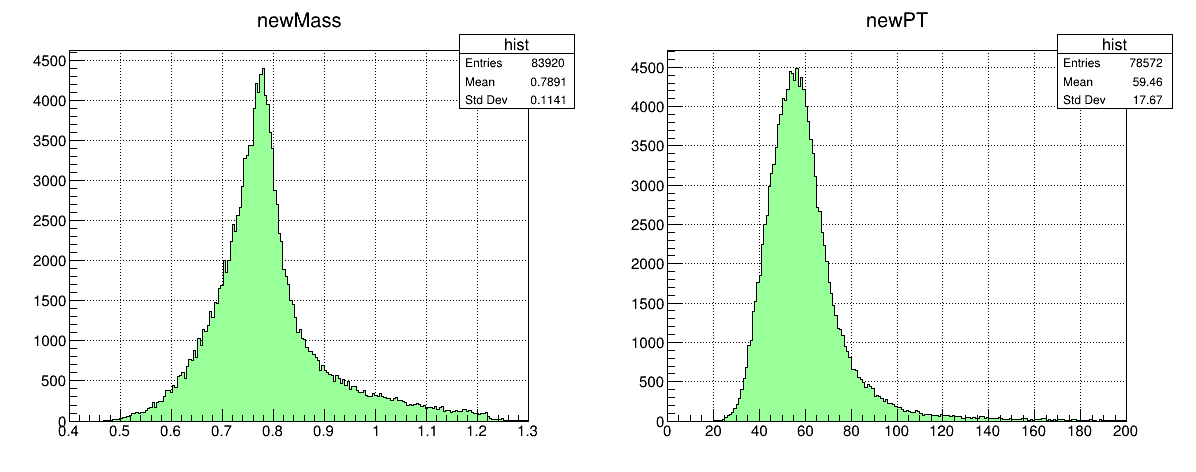

In [32]:
dfSGN = (dfSGN.Define("newMass", '''goodMeson_Nphotons[0] == 1 ? Vec_f {sum2Body(goodMeson_ditrk_pt[0], goodMeson_ditrk_eta[0], goodMeson_ditrk_phi[0], goodMeson_ditrk_mass[0], 
	goodMeson_photon1_pt[0], goodMeson_photon1_eta[0], goodMeson_photon1_phi[0], 0.1349766).M()} : goodMeson_mass''')
    .Define("newPT", '''sum3Body(goodMeson_ditrk_pt[0], goodMeson_ditrk_eta[0], goodMeson_ditrk_phi[0], goodMeson_ditrk_mass[0], 
	goodMeson_photon1_pt[0], goodMeson_photon1_eta[0], goodMeson_photon1_phi[0], 0.1349766,
	0.0, 0.0, 0.0, 0.0).Pt()'''))

canvas = ROOT.TCanvas("canvas", "canvas", 1200, 500)
canvas.Divide(2, 1)

p = canvas.cd(1)
nbins, xlow, xhigh = 200, 0.4, 1.3
hNewMass = dfSGN.Histo1D(("hist", "newMass", nbins, xlow, xhigh), "newMass", "scale")
hNewMass.SetFillColor(ROOT.kGreen-9)
hNewMass.SetLineColor(ROOT.kBlack)
hNewMass.Draw("hist")
p.SetGrid()

p = canvas.cd(2)
nbins, xlow, xhigh = 200, 0.0, 200.
hNewPt = dfSGN.Filter("goodMeson_Nphotons[0] == 1").Histo1D(("hist", "newPT", nbins, xlow, xhigh), "newPT", "scale")
hNewPt.SetFillColor(ROOT.kGreen-9)
hNewPt.SetLineColor(ROOT.kBlack)
hNewPt.Draw("hist")
p.SetGrid()

canvas.Draw()

In [33]:
cols = ["newMass", "goodMeson_mass", "HCandMass"]
x = dfSGN.AsNumpy(columns=cols)
pddf = pd.DataFrame(x)
display(pddf)

,newMass,goodMeson_mass,HCandMass
0,[0.795226514339447],[0.7590053677558899],124.572762
1,[0.7370608448982239],[0.6306566596031189],120.231148
2,[0.9375],[0.8974431753158569],126.816734
3,[0.810092568397522],[0.7684832811355591],119.132149
4,[0.7491857409477234],[0.6344964504241943],120.920937
...,...,...,...
83915,[0.6179287433624268],[0.5067962408065796],123.658142
83916,[0.7333769798278809],[0.6987966299057007],125.551346
83917,[0.8081690669059753],[0.7771316766738892],126.103493
83918,[0.8413594365119934],[0.8232017755508423],129.742233


MASS STD RECO:	 0.12786106413888035
MASS STD NEW :	 0.11310986524802341 -0.1153689670127761
PT STD RECO:	 5.099945294425985
PT STD NEW :	 5.09994529123614


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


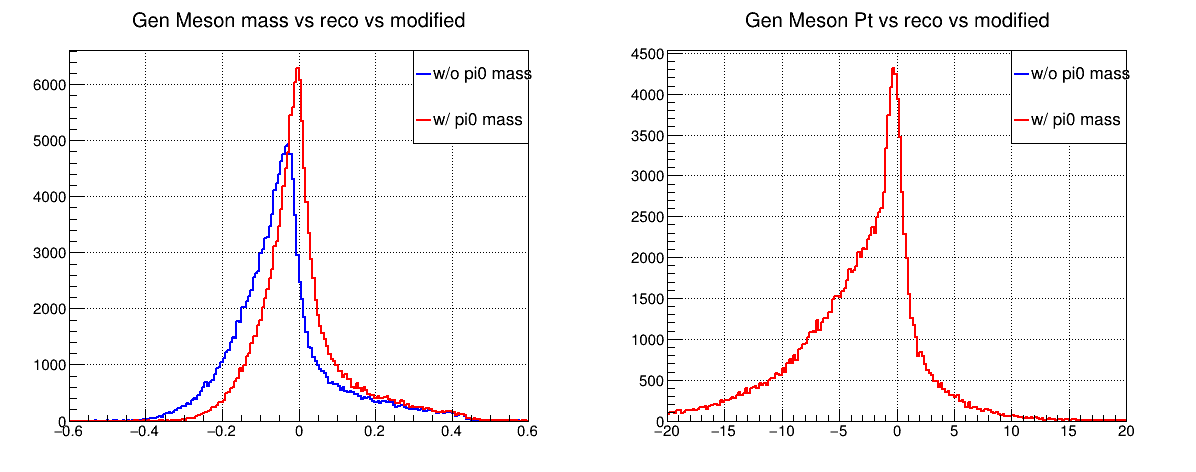

In [35]:
canvas = ROOT.TCanvas("canvas", "canvas", 1200, 500)
canvas.Divide(2, 1)

nbins, xlow, xhigh = 200, -0.6, 0.6
p = canvas.cd(1)
hrecodiff = dfSGN.Define("RecoDiff", "goodMeson_mass - goodMeson_mass_GEN").Histo1D(("hist", "title", nbins, xlow, xhigh), "RecoDiff", "scale").GetValue()
hrecodiff.SetLineWidth(2)
hrecodiff.SetLineColor(ROOT.kBlue)
#hrecodiff.Draw("hist")

hnewdiff = dfSGN.Define("NewDiff", "newMass - goodMeson_mass_GEN").Histo1D(("hist", "title", nbins, xlow, xhigh), "NewDiff", "scale").GetValue()
hnewdiff.SetLineWidth(2)
hnewdiff.SetLineColor(ROOT.kRed)
#hnewdiff.Draw("hist")

stack4 = ROOT.THStack("stack", "Gen Meson mass vs reco vs modified")
stack4.Add(hrecodiff)
stack4.Add(hnewdiff)
stack4.Draw("hist nostack")
legend4 = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend4.SetMargin(0.17)
#legend.SetBorderSize(0)
legend4.SetTextSize(0.04)
legend4.AddEntry(hrecodiff, "w/o pi0 mass", "l")
legend4.AddEntry(hnewdiff, "w/ pi0 mass", "l")
legend4.Draw()

p.SetGrid()

nbins, xlow, xhigh = 200, -20., 20.
p = canvas.cd(2)
hrecodiffPt = dfSGN.Filter("goodMeson_Nphotons[0] == 1").Define("RecoDiffPt", "goodMeson_pt - goodMeson_pt_GEN").Histo1D(("hist", "title", nbins, xlow, xhigh), "RecoDiffPt", "scale").GetValue()
hrecodiffPt.SetLineWidth(2)
hrecodiffPt.SetLineColor(ROOT.kBlue)
#hrecodiffPt.Draw("hist")

hnewdiffPt = dfSGN.Filter("goodMeson_Nphotons[0] == 1").Define("NewDiffPt", "newPT - goodMeson_pt_GEN").Histo1D(("hist", "title", nbins, xlow, xhigh), "NewDiffPt", "scale").GetValue()
hnewdiffPt.SetLineWidth(2)
hnewdiffPt.SetLineColor(ROOT.kRed)
#hnewdiffPt.Draw("hist")

stack5 = ROOT.THStack("stack", "Gen Meson Pt vs reco vs modified")
stack5.Add(hrecodiffPt)
stack5.Add(hnewdiffPt)
stack5.Draw("hist nostack")
legend5 = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend5.SetMargin(0.17)
#legend.SetBorderSize(0)
legend5.SetTextSize(0.04)
legend5.AddEntry(hrecodiffPt, "w/o pi0 mass", "l")
legend5.AddEntry(hnewdiffPt, "w/ pi0 mass", "l")
legend5.Draw()

p.SetGrid()


canvas.Draw()

print("MASS STD RECO:\t", hrecodiff.GetStdDev())
print("MASS STD NEW :\t", hnewdiff.GetStdDev(), hnewdiff.GetStdDev()/hrecodiff.GetStdDev()-1)

print("PT STD RECO:\t", hrecodiffPt.GetStdDev())
print("PT STD NEW :\t", hnewdiffPt.GetStdDev())

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


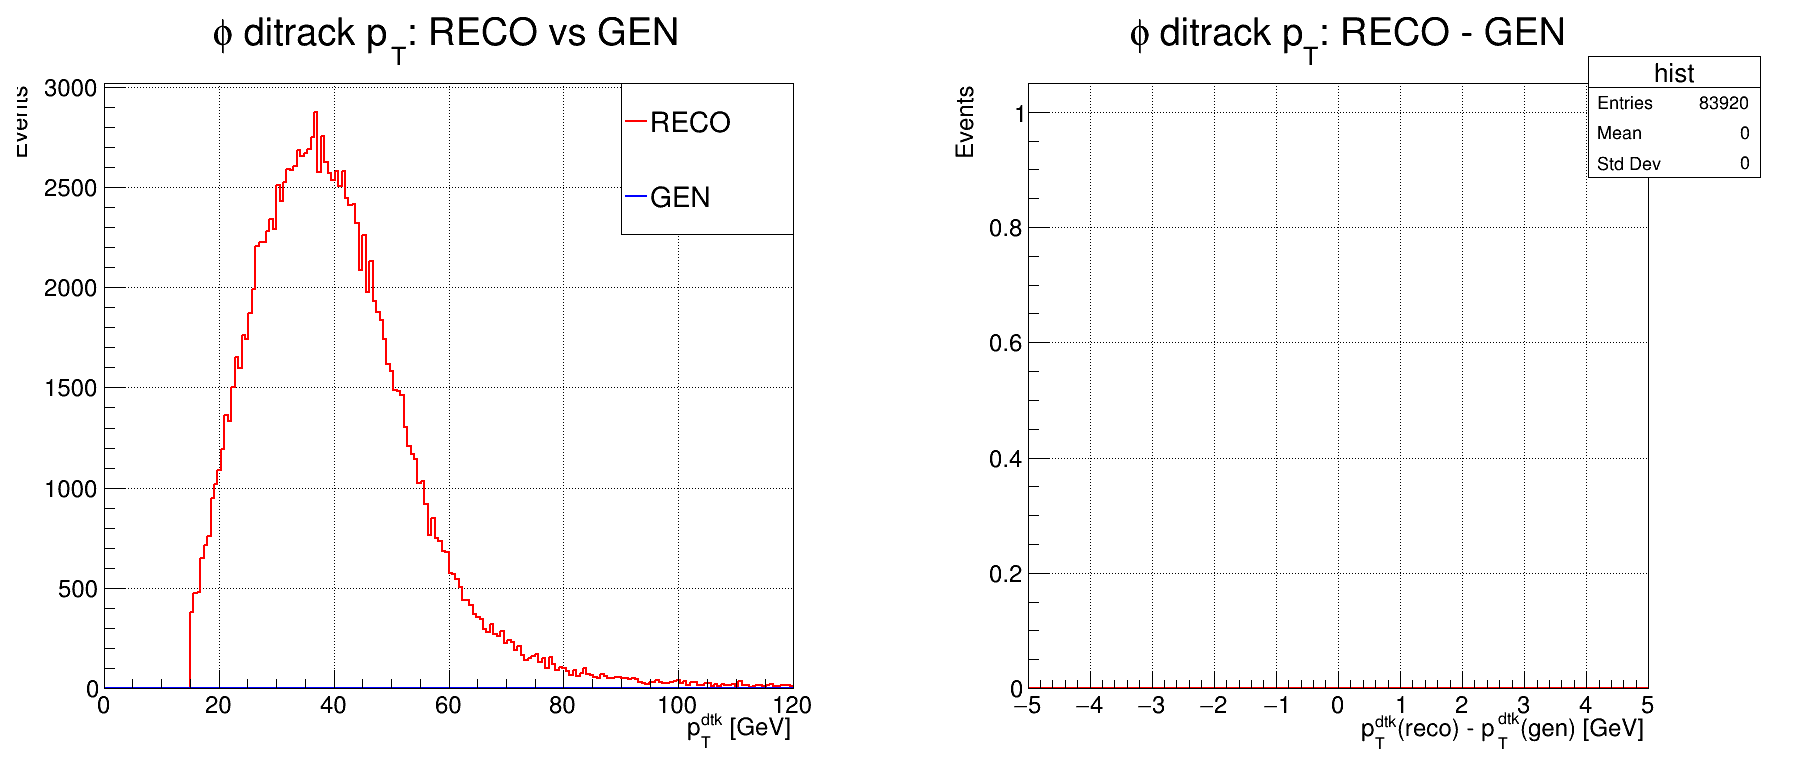

In [36]:
canvas = ROOT.TCanvas("canvas", "canvas", 1800, 800)
canvas.Divide(2, 1)

nbins, xlow, xhigh = 200, 0.0, 120.0
p = canvas.cd(1)
#hrecodiff = dfSGN.Define("RecoDiff", "goodMeson_mass - goodMeson_mass_GEN").Histo1D(("hist", "title", nbins, xlow, xhigh), "RecoDiff", "scale").GetValue()
hreco = dfSGN.Histo1D(("hist", "title", nbins, xlow, xhigh), "goodMeson_ditrk_pt", "scale").GetValue()
hreco.SetLineWidth(2)
hreco.SetLineColor(ROOT.kRed)
#hrecodiff.Draw("hist")

hgen = dfSGN.Histo1D(("hist", "title", nbins, xlow, xhigh), "goodMeson_ditrk_pt_GEN", "scale").GetValue()
hgen.SetLineWidth(2)
hgen.SetLineColor(ROOT.kBlue)
#hnewdiff.Draw("hist")

stack4 = ROOT.THStack("stack", "#phi ditrack p_{T}: RECO vs GEN")
stack4.Add(hreco)
stack4.Add(hgen)
stack4.Draw("hist nostack")
legend4 = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend4.SetMargin(0.17)
#legend.SetBorderSize(0)
legend4.SetTextSize(0.04)
legend4.AddEntry(hreco, "RECO", "l")
legend4.AddEntry(hgen, "GEN", "l")
legend4.Draw()

stack4.GetXaxis().SetTitle("p_{T}^{dtk} [GeV]")
stack4.GetYaxis().SetTitle("Events")

p.SetGrid()

nbins, xlow, xhigh = 200, -5., 5.
p = canvas.cd(2)
hrecodiff = dfSGN.Define("RecoDiff", "goodMeson_ditrk_pt - goodMeson_ditrk_pt_GEN").Histo1D(("hist", "#phi ditrack p_{T}: RECO - GEN", nbins, xlow, xhigh), "RecoDiff", "scale").GetValue()
hrecodiff.SetLineColor(ROOT.kRed)
hrecodiff.SetLineWidth(2)
hrecodiff.Draw("hist")

hrecodiff.GetXaxis().SetTitle("p_{T}^{dtk}(reco) - p_{T}^{dtk}(gen) [GeV]")
hrecodiff.GetYaxis().SetTitle("Events")
p.SetRightMargin(0.15)
p.SetLeftMargin(0.13)

p.SetGrid()


canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


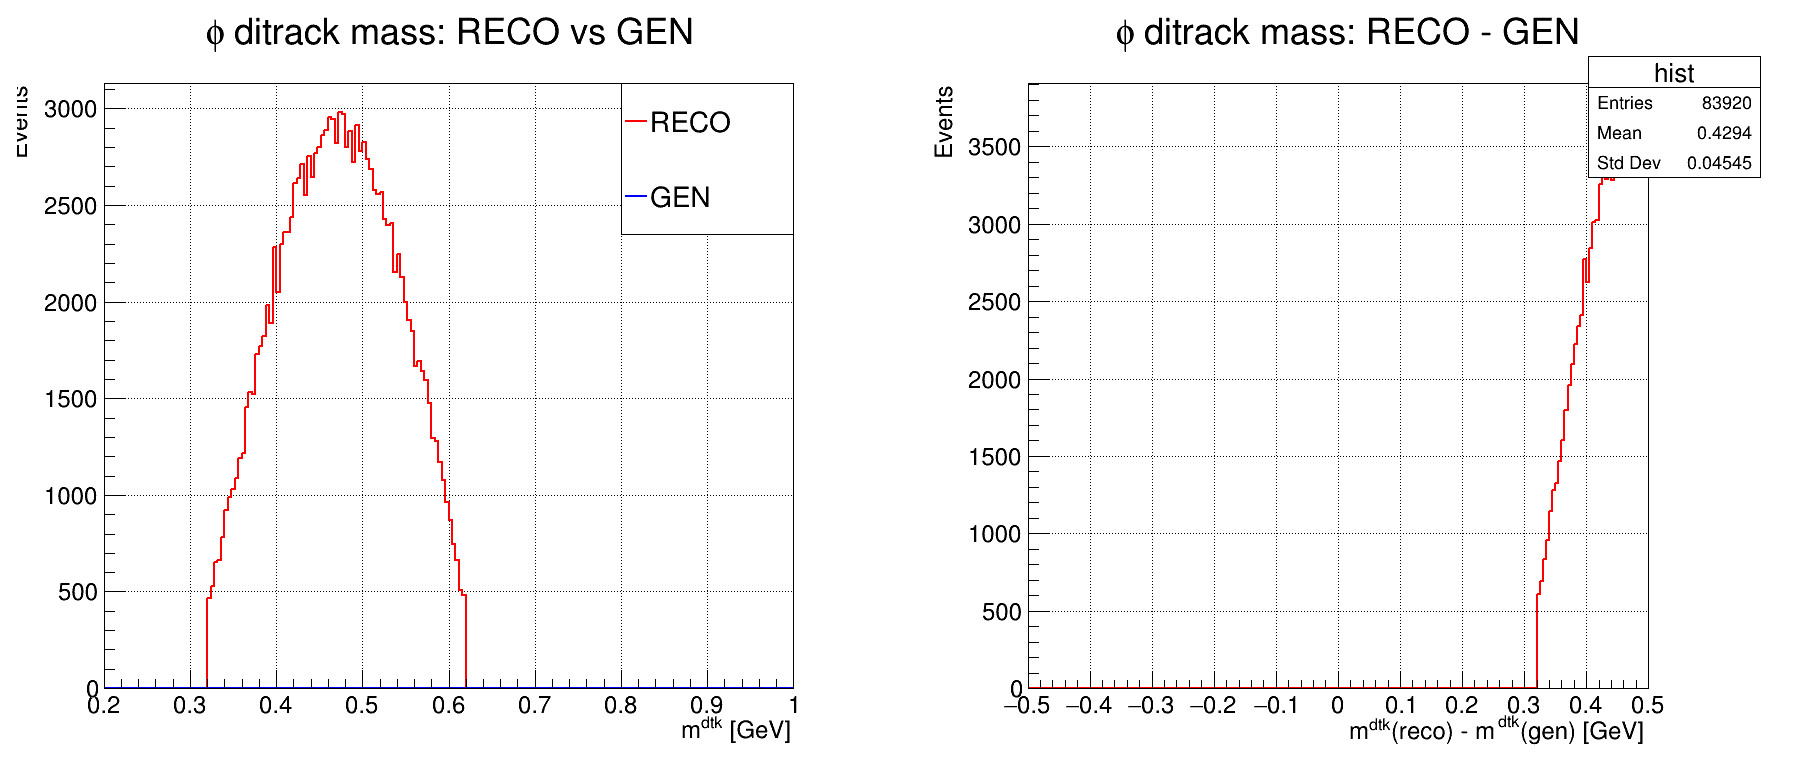

In [37]:
canvas = ROOT.TCanvas("canvas", "canvas", 1800, 800)
canvas.Divide(2, 1)

nbins, xlow, xhigh = 200, 0.2, 1.0
p = canvas.cd(1)
#hrecodiff = dfSGN.Define("RecoDiff", "goodMeson_mass - goodMeson_mass_GEN").Histo1D(("hist", "title", nbins, xlow, xhigh), "RecoDiff", "scale").GetValue()
hreco = dfSGN.Histo1D(("hist", "title", nbins, xlow, xhigh), "goodMeson_ditrk_mass", "scale").GetValue()
hreco.SetLineWidth(2)
hreco.SetLineColor(ROOT.kRed)
#hrecodiff.Draw("hist")

hgen = dfSGN.Histo1D(("hist", "title", nbins, xlow, xhigh), "goodMeson_ditrk_mass_GEN", "scale").GetValue()
hgen.SetLineWidth(2)
hgen.SetLineColor(ROOT.kBlue)
#hnewdiff.Draw("hist")

stack4 = ROOT.THStack("stack", "#phi ditrack mass: RECO vs GEN")
stack4.Add(hreco)
stack4.Add(hgen)
stack4.Draw("hist nostack")
legend4 = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend4.SetMargin(0.17)
#legend.SetBorderSize(0)
legend4.SetTextSize(0.04)
legend4.AddEntry(hreco, "RECO", "l")
legend4.AddEntry(hgen, "GEN", "l")
legend4.Draw()

stack4.GetXaxis().SetTitle("m^{dtk} [GeV]")
stack4.GetYaxis().SetTitle("Events")

p.SetGrid()

nbins, xlow, xhigh = 200, -0.5, 0.5
p = canvas.cd(2)
hrecodiff = dfSGN.Define("RecoDiff", "goodMeson_ditrk_mass - goodMeson_ditrk_mass_GEN").Histo1D(("hist", "#phi ditrack mass: RECO - GEN", nbins, xlow, xhigh), "RecoDiff", "scale").GetValue()
hrecodiff.SetLineColor(ROOT.kRed)
hrecodiff.SetLineWidth(2)
hrecodiff.Draw("hist")

hrecodiff.GetXaxis().SetTitle("m^{dtk}(reco) - m^{dtk}(gen) [GeV]")
hrecodiff.GetYaxis().SetTitle("Events")
p.SetRightMargin(0.15)
p.SetLeftMargin(0.13)

p.SetGrid()


canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


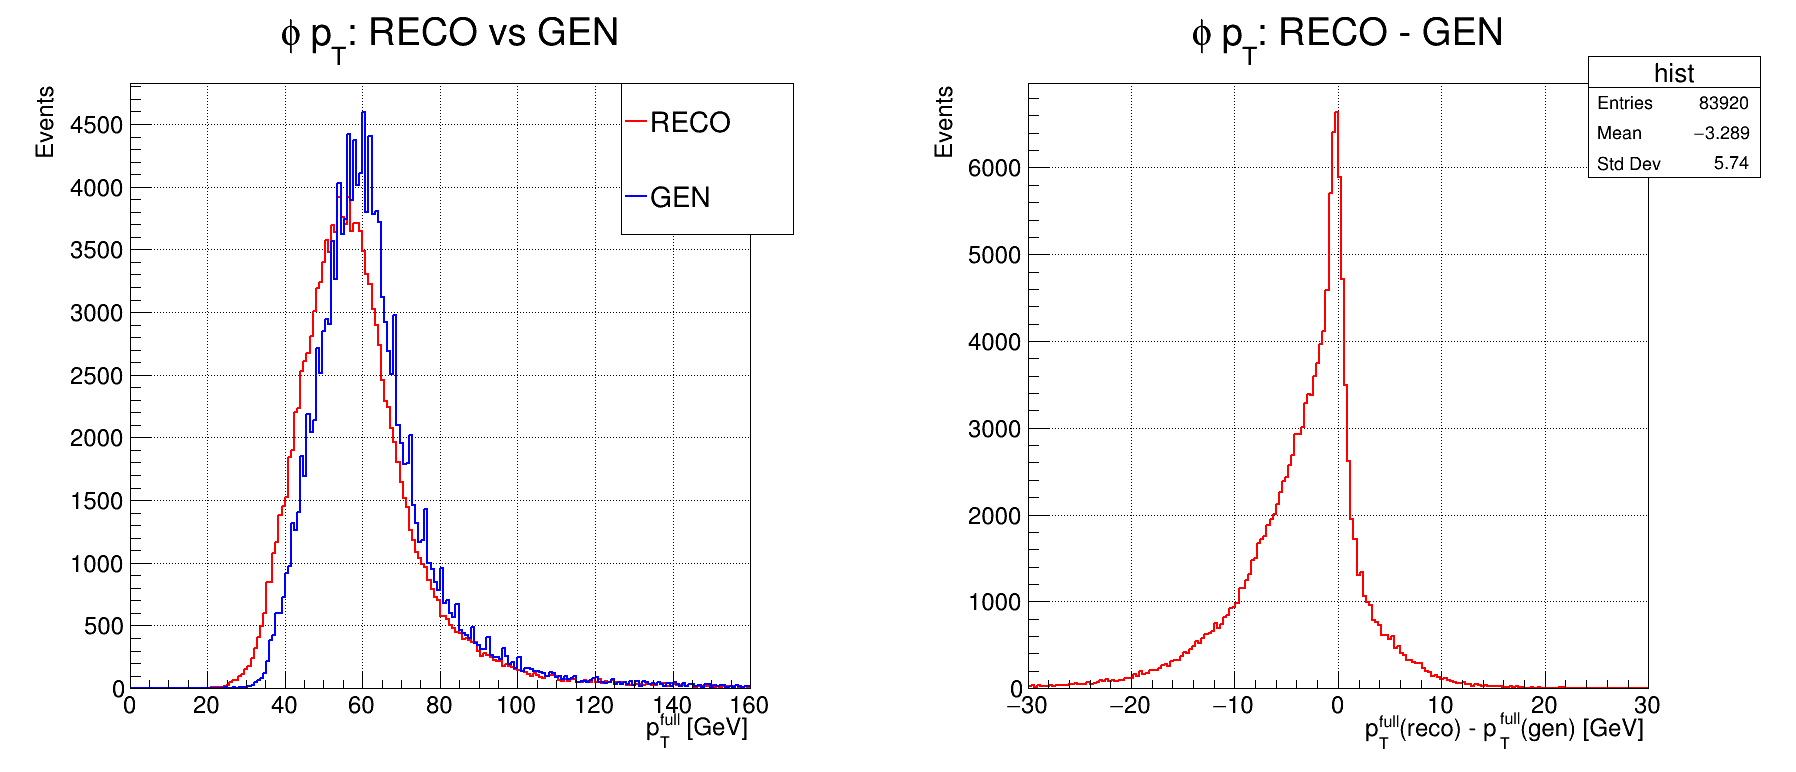

In [38]:
canvas = ROOT.TCanvas("canvas", "canvas", 1800, 800)
canvas.Divide(2, 1)

nbins, xlow, xhigh = 200, 0.0, 160.0
p = canvas.cd(1)
#hrecodiff = dfSGN.Define("RecoDiff", "goodMeson_pt - goodMeson_mass_GEN").Histo1D(("hist", "title", nbins, xlow, xhigh), "RecoDiff", "scale").GetValue()
hreco = dfSGN.Histo1D(("hist", "title", nbins, xlow, xhigh), "goodMeson_pt", "scale").GetValue()
hreco.SetLineWidth(2)
hreco.SetLineColor(ROOT.kRed)
#hrecodiff.Draw("hist")

hgen = dfSGN.Histo1D(("hist", "title", nbins, xlow, xhigh), "goodMeson_pt_GEN", "scale").GetValue()
hgen.SetLineWidth(2)
hgen.SetLineColor(ROOT.kBlue)
#hnewdiff.Draw("hist")

stack4 = ROOT.THStack("stack", "#phi p_{T}: RECO vs GEN")
stack4.Add(hreco)
stack4.Add(hgen)
stack4.Draw("hist nostack")
legend4 = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend4.SetMargin(0.17)
#legend.SetBorderSize(0)
legend4.SetTextSize(0.04)
legend4.AddEntry(hreco, "RECO", "l")
legend4.AddEntry(hgen, "GEN", "l")
legend4.Draw()

stack4.GetXaxis().SetTitle("p_{T}^{full} [GeV]")
stack4.GetYaxis().SetTitle("Events")
p.SetRightMargin(0.15)
p.SetLeftMargin(0.13)

p.SetGrid()

nbins, xlow, xhigh = 200, -30.0, 30.0
p = canvas.cd(2)
hrecodiff = dfSGN.Define("RecoDiff", "goodMeson_pt - goodMeson_pt_GEN").Histo1D(("hist", "#phi p_{T}: RECO - GEN", nbins, xlow, xhigh), "RecoDiff", "scale").GetValue()
hrecodiff.SetLineColor(ROOT.kRed)
hrecodiff.SetLineWidth(2)
hrecodiff.Draw("hist")

hrecodiff.GetXaxis().SetTitle("p_{T}^{full}(reco) - p_{T}^{full}(gen) [GeV]")
hrecodiff.GetYaxis().SetTitle("Events")
p.SetRightMargin(0.15)
p.SetLeftMargin(0.13)

p.SetGrid()


canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


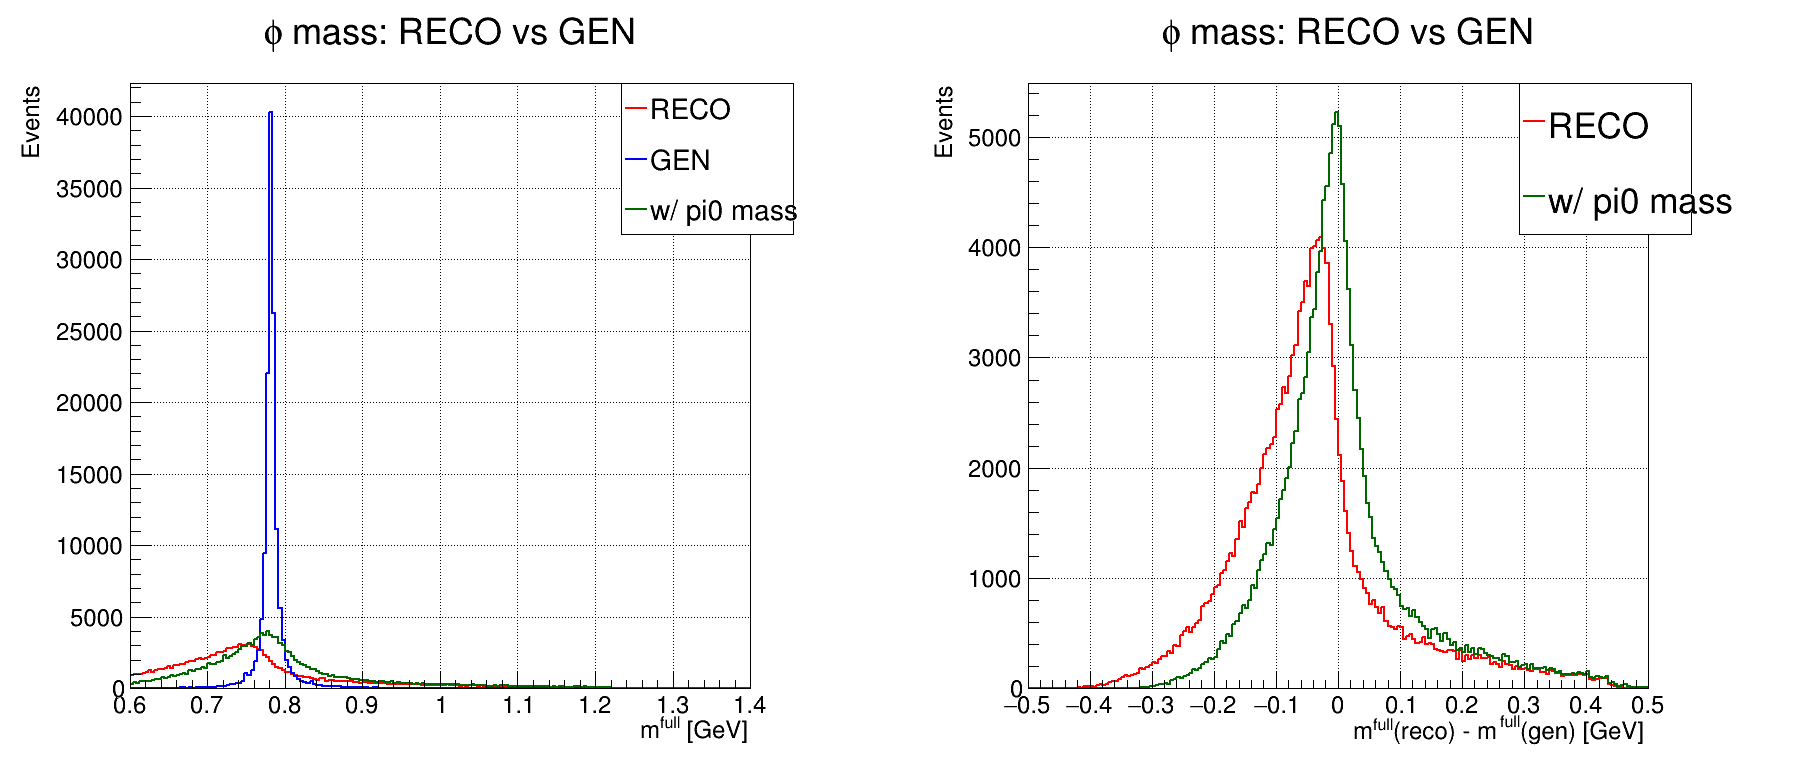

In [39]:
canvas = ROOT.TCanvas("canvas", "canvas", 1800, 800)
canvas.Divide(2, 1)

nbins, xlow, xhigh = 200, 0.6, 1.4
p = canvas.cd(1)
#hrecodiff = dfSGN.Define("RecoDiff", "goodMeson_mass - goodMeson_mass_GEN").Histo1D(("hist", "title", nbins, xlow, xhigh), "RecoDiff", "scale").GetValue()
hreco = dfSGN.Histo1D(("hist", "title", nbins, xlow, xhigh), "goodMeson_mass", "scale").GetValue()
hreco.SetLineWidth(2)
hreco.SetLineColor(ROOT.kRed)
#hrecodiff.Draw("hist")

hgen = dfSGN.Histo1D(("hist", "title", nbins, xlow, xhigh), "goodMeson_mass_GEN", "scale").GetValue()
hgen.SetLineWidth(2)
hgen.SetLineColor(ROOT.kBlue)
#hnewdiff.Draw("hist")

hnew = dfSGN.Histo1D(("hist", "title", nbins, xlow, xhigh), "newMass", "scale").GetValue()
hnew.SetLineWidth(2)
hnew.SetLineColor(ROOT.kGreen+3)
#hnewdiff.Draw("hist")

stack4 = ROOT.THStack("stack", "#phi mass: RECO vs GEN")
stack4.Add(hreco)
stack4.Add(hgen)
stack4.Add(hnew)
stack4.Draw("hist nostack")
legend4 = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend4.SetMargin(0.17)
#legend.SetBorderSize(0)
legend4.SetTextSize(0.04)
legend4.AddEntry(hreco, "RECO", "l")
legend4.AddEntry(hgen, "GEN", "l")
legend4.AddEntry(hnew, "w/ pi0 mass", "l")
legend4.Draw()

stack4.GetXaxis().SetTitle("m^{full} [GeV]")
stack4.GetYaxis().SetTitle("Events")
p.SetRightMargin(0.15)
p.SetLeftMargin(0.13)

p.SetGrid()

nbins, xlow, xhigh = 200, -0.5, 0.5
p = canvas.cd(2)
hrecodiff = dfSGN.Define("RecoDiff", "goodMeson_mass - goodMeson_mass_GEN").Histo1D(("hist", "#phi mass: RECO - GEN", nbins, xlow, xhigh), "RecoDiff", "scale").GetValue()
hrecodiff.SetLineColor(ROOT.kRed)
hrecodiff.SetLineWidth(2)

hnewdiff = dfSGN.Define("NewDiff", "newMass - goodMeson_mass_GEN").Histo1D(("hist", "#phi mass: RECO - GEN", nbins, xlow, xhigh), "NewDiff", "scale").GetValue()
hnewdiff.SetLineColor(ROOT.kGreen+3)
hnewdiff.SetLineWidth(2)

stack5 = ROOT.THStack("stack", "#phi mass: RECO vs GEN")
stack5.Add(hrecodiff)
stack5.Add(hnewdiff)
stack5.Draw("hist nostack")
legend5 = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend5.SetMargin(0.17)
#legend.SetBorderSize(0)
legend5.SetTextSize(0.05)
legend5.AddEntry(hrecodiff, "RECO", "l")
legend5.AddEntry(hnewdiff, "w/ pi0 mass", "l")
legend5.Draw()

stack5.GetXaxis().SetTitle("m^{full}(reco) - m^{full}(gen) [GeV]")
stack5.GetYaxis().SetTitle("Events")
p.SetRightMargin(0.15)
p.SetLeftMargin(0.13)

p.SetGrid()


canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


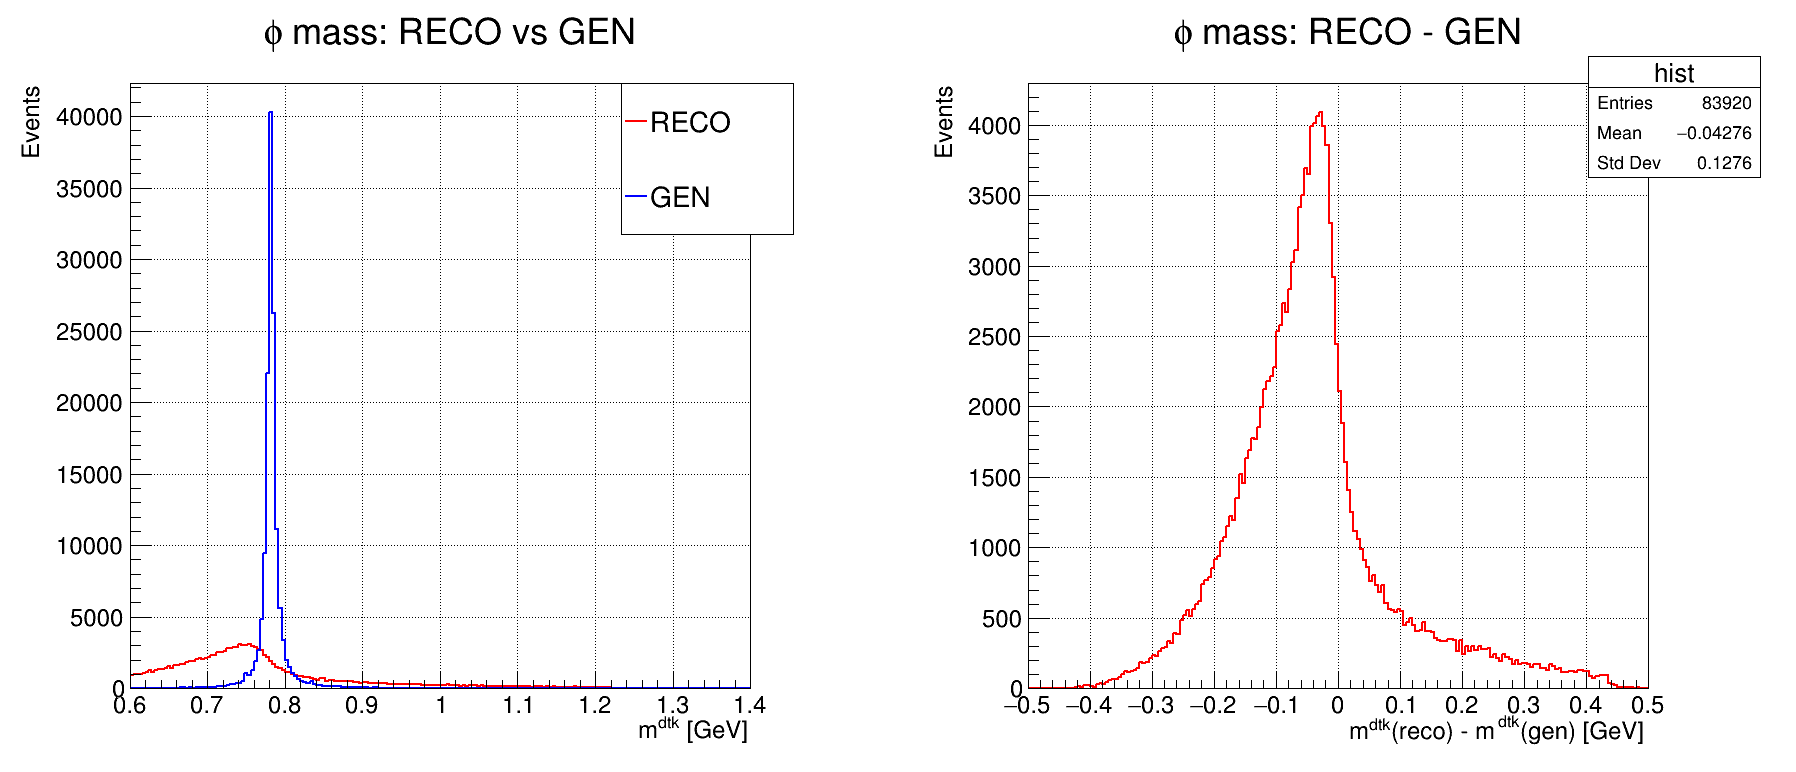

In [40]:
canvas = ROOT.TCanvas("canvas", "canvas", 1800, 800)
canvas.Divide(2, 1)

nbins, xlow, xhigh = 200, 0.6, 1.4
p = canvas.cd(1)
#hrecodiff = dfSGN.Define("RecoDiff", "goodMeson_mass - goodMeson_mass_GEN").Histo1D(("hist", "title", nbins, xlow, xhigh), "RecoDiff", "scale").GetValue()
hreco = dfSGN.Histo1D(("hist", "title", nbins, xlow, xhigh), "goodMeson_mass", "scale").GetValue()
hreco.SetLineWidth(2)
hreco.SetLineColor(ROOT.kRed)
#hrecodiff.Draw("hist")

hgen = dfSGN.Histo1D(("hist", "title", nbins, xlow, xhigh), "goodMeson_mass_GEN", "scale").GetValue()
hgen.SetLineWidth(2)
hgen.SetLineColor(ROOT.kBlue)
#hnewdiff.Draw("hist")

stack4 = ROOT.THStack("stack", "#phi mass: RECO vs GEN")
stack4.Add(hreco)
stack4.Add(hgen)
stack4.Draw("hist nostack")
legend4 = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend4.SetMargin(0.17)
#legend.SetBorderSize(0)
legend4.SetTextSize(0.04)
legend4.AddEntry(hreco, "RECO", "l")
legend4.AddEntry(hgen, "GEN", "l")
legend4.Draw()

stack4.GetXaxis().SetTitle("m^{dtk} [GeV]")
stack4.GetYaxis().SetTitle("Events")
p.SetRightMargin(0.15)
p.SetLeftMargin(0.13)

p.SetGrid()

nbins, xlow, xhigh = 200, -0.5, 0.5
p = canvas.cd(2)
hrecodiff = dfSGN.Define("RecoDiff", "goodMeson_mass - goodMeson_mass_GEN").Histo1D(("hist", "#phi mass: RECO - GEN", nbins, xlow, xhigh), "RecoDiff", "scale").GetValue()
hrecodiff.SetLineColor(ROOT.kRed)
hrecodiff.SetLineWidth(2)
hrecodiff.Draw("hist")

hrecodiff.GetXaxis().SetTitle("m^{dtk}(reco) - m^{dtk}(gen) [GeV]")
hrecodiff.GetYaxis().SetTitle("Events")
p.SetRightMargin(0.15)
p.SetLeftMargin(0.13)

p.SetGrid()


canvas.Draw()

NEW APPROACH sum both photons

In [12]:
dfSGN_new = (dfSGN.Define("neutralParticle_pt", "sum2Body(goodMeson_photon1_pt[0], goodMeson_photon1_eta[0], goodMeson_photon1_phi[0], 0, goodMeson_photon2_pt[0], goodMeson_photon2_eta[0], goodMeson_photon2_phi[0], 0).Pt()")
        .Define("neutralParticle_eta", "sum2Body(goodMeson_photon1_pt[0], goodMeson_photon1_eta[0], goodMeson_photon1_phi[0], 0, goodMeson_photon2_pt[0], goodMeson_photon2_eta[0], goodMeson_photon2_phi[0], 0).Eta()")
        .Define("neutralParticle_phi", "sum2Body(goodMeson_photon1_pt[0], goodMeson_photon1_eta[0], goodMeson_photon1_phi[0], 0, goodMeson_photon2_pt[0], goodMeson_photon2_eta[0], goodMeson_photon2_phi[0], 0).Phi()")
        .Define("neutralParticle_mass", "sum2Body(goodMeson_photon1_pt[0], goodMeson_photon1_eta[0], goodMeson_photon1_phi[0], 0, goodMeson_photon2_pt[0], goodMeson_photon2_eta[0], goodMeson_photon2_phi[0], 0).M()")
        .Define("neutralParticle_energy", "sum2Body(goodMeson_photon1_pt[0], goodMeson_photon1_eta[0], goodMeson_photon1_phi[0], 0, goodMeson_photon2_pt[0], goodMeson_photon2_eta[0], goodMeson_photon2_phi[0], 0).E()")
        .Define("Diff_NP_pt", "neutralParticle_pt - goodMeson_photon1_pt_GEN")
        .Define("Diff_NP_eta", "neutralParticle_eta - goodMeson_photon1_eta_GEN")
        .Define("Diff_NP_phi", "neutralParticle_phi - goodMeson_photon1_phi_GEN"))

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


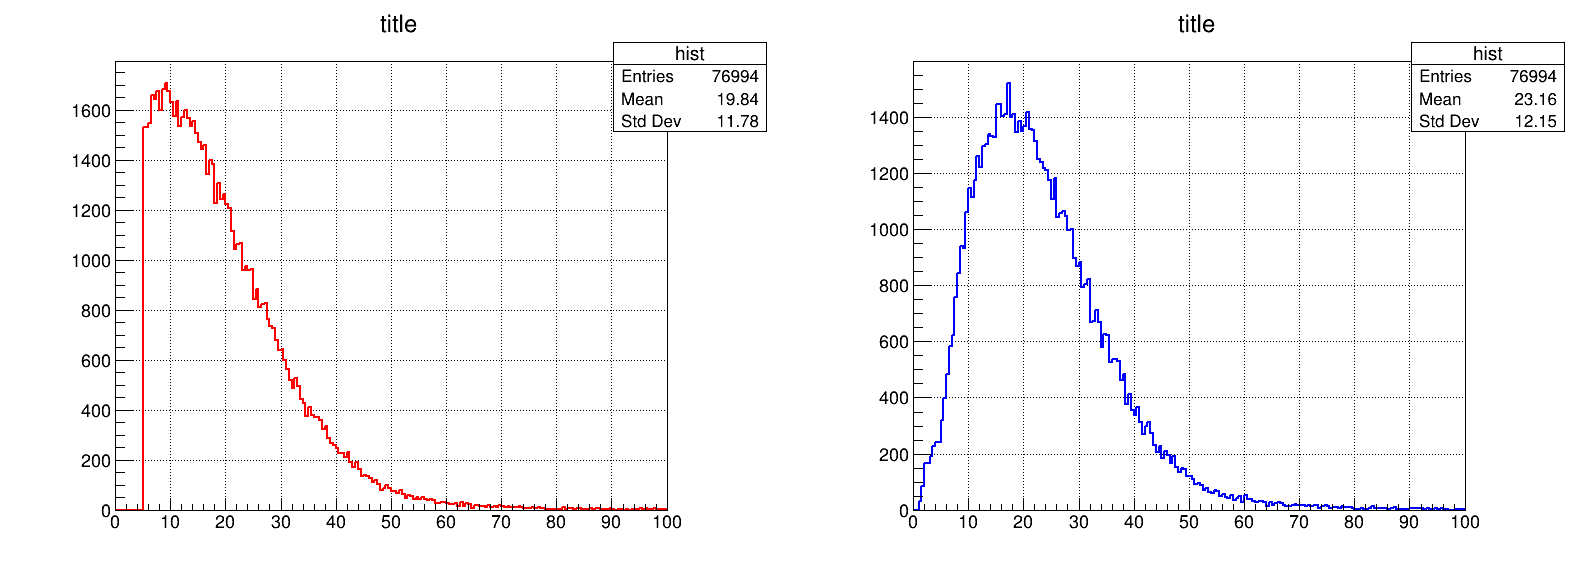

In [13]:
pi1Mass = 0.13957018
k1Mass = 0.493677

canvas = ROOT.TCanvas("canvas", "canvas", 1600, 600)
canvas.Divide(2, 1)

nbins, xlow, xhigh = 200, 0.0, 100.0
#nbins, xlow, xhigh = 200, -1, 1

p = canvas.cd(1)
hrecodiff = dfSGN_new.Filter("goodMeson_Nphotons[0] > 0").Histo1D(("hist", "title", nbins, xlow, xhigh), "neutralParticle_pt").GetValue()
hrecodiff.SetLineColor(ROOT.kRed)
hrecodiff.SetLineWidth(2)
hrecodiff.Draw("hist")

p.SetRightMargin(0.15)
p.SetLeftMargin(0.13)

p.SetGrid()
#p.SetLogy()

p = canvas.cd(2)
hgen = dfSGN_new.Histo1D(("hist", "title", nbins, xlow, xhigh), "goodMeson_photon1_pt_GEN").GetValue()
hgen.SetLineColor(ROOT.kBlue)
hgen.SetLineWidth(2)
hgen.Draw("hist")

p.SetRightMargin(0.15)
p.SetLeftMargin(0.13)

p.SetGrid()
#p.SetLogy()

canvas.Draw()

In [36]:
s = '''

    PtEtaPhiMVector fourMomentum(20.0, 1.3, 2.4, 2.3456);
    cout << fourMomentum.pt() << endl;
    cout << fourMomentum.eta() << endl;
    cout << fourMomentum.phi() << endl;
    cout << fourMomentum.M() << endl;
    cout << fourMomentum.x() << endl;
    cout << fourMomentum.y() << endl;
    cout << fourMomentum.z() << endl;
    cout << fourMomentum.E() << endl;
    '''

ROOT.gInterpreter.ProcessLine(s)

140344628751200

20
1.3
2.4
2.3456
-14.7479
13.5093
33.9676
39.488
